In [32]:
import tensorflow as tf # библиотека для обучения нейронной сети
import cv2 # библиотека компьютерного зрения
import matplotlib.pyplot as plt # визуализация
import numpy as np
import random
import os

In [33]:
categories = ["angry", "fear", "happy", "neutral", "sad", "surprise"] # название шести классов эмоций

In [34]:
example_img = cv2.imread("train/angry/Training_3908.jpg")
example_img.shape

(48, 48, 3)

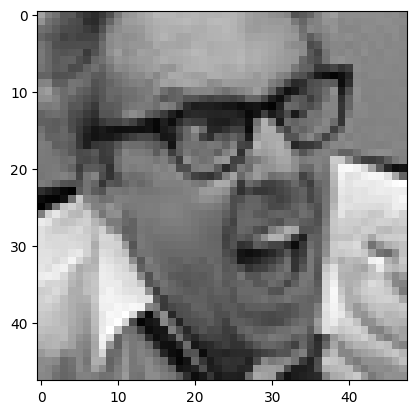

In [35]:
plt.imshow(example_img)

# Чтение датасета

In [36]:
training_data = []
img_size = (64, 64)
limit = 3000 # количество изображений, попадающие в обучающую выборку с каждого датасета

for num, category in enumerate(categories):
    path = os.path.join("train/", category)
    cnt = 0
    for img in os.listdir(path):
        if cnt == limit:
            break
        img = cv2.imread(os.path.join(path, img))
        img = np.array([[el2[0] for el2 in el1] for el1 in img]) # Так как изображение ч/б, оставим только один параметр на пиксель
        img = cv2.resize(img, img_size)
        training_data.append([img, num])
        cnt += 1

In [37]:
len(training_data)

18000

In [38]:
training_data[0][0].shape

(64, 64)

In [39]:
random.shuffle(training_data) # перемешиваем данные

In [40]:
X = [] # фичи
y = [] # класс

for features, category in training_data:
    X.append(features)
    y.append(category)

X = np.array(X)
y = np.array(y)

neutral


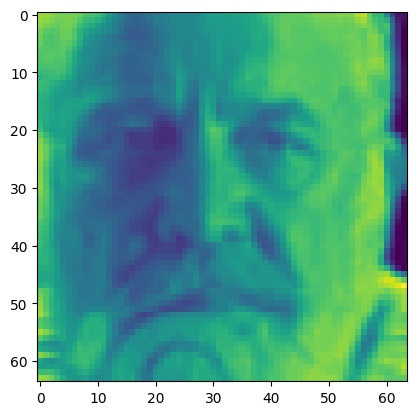

In [41]:
plt.imshow(X[0])
print(categories[y[0]])

# Создание модели

Будем использовать свёрточную нейронную сеть с такой архитектурой:

In [42]:
model = keras.Sequential([
tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

In [43]:
# используем стандартные параметры для обучения модели многоклассовой классификации
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Подготовка к валидации

Для тестирования буду использовать метрику accurcy

In [44]:
testing_data = []
test_limit = 200 # количество изображений, попадающие в тестовую выборку с каждого датасета

for num, category in enumerate(categories):
    path = os.path.join("test/", category)
    cnt = 0
    for img in os.listdir(path):
        if cnt == test_limit:
            break
        img = cv2.imread(os.path.join(path, img))
        img = np.array([[el2[0] for el2 in el1] for el1 in img])
        img = cv2.resize(img, img_size)
        testing_data.append([img, num])
        cnt += 1

In [45]:
random.shuffle(testing_data) # перемешиваем данные

In [46]:
X_test = []
y_test = []

for features, category in testing_data:
    X_test.append(features)
    y_test.append(category)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Подбор количества эпох

In [47]:
for i in range(5, 25, 5):
    model.fit(X, np.array(y), epochs = 5)
    model.evaluate(X_test, y_test)

Epoch 1/5
563/563 [==============================] - 52s 89ms/step - loss: 2.1670 - accuracy: 0.2232
Epoch 2/5
563/563 [==============================] - 51s 91ms/step - loss: 1.6291 - accuracy: 0.3231
Epoch 3/5
563/563 [==============================] - 54s 96ms/step - loss: 1.5239 - accuracy: 0.3847
Epoch 4/5
563/563 [==============================] - 51s 91ms/step - loss: 1.4295 - accuracy: 0.4309
Epoch 5/5
38/38 [==============================] - 1s 28ms/step - loss: 1.4064 - accuracy: 0.4500
Epoch 1/5
563/563 [==============================] - 51s 91ms/step - loss: 1.2725 - accuracy: 0.5010
Epoch 2/5
563/563 [==============================] - 51s 90ms/step - loss: 1.1769 - accuracy: 0.5420
Epoch 3/5
563/563 [==============================] - 51s 91ms/step - loss: 1.0783 - accuracy: 0.5858
Epoch 4/5
563/563 [==============================] - 51s 91ms/step - loss: 0.9539 - accuracy: 0.6383
Epoch 5/5
38/38 [==============================] - 1s 28ms/step - loss: 1.6402 - accuracy: 0.4

### Свойства модели на разных эпохах:
Эпоха: 5<br>
Точность на обучающей выборке: 0.468<br>
Точность на валидационной выборке: 0.45<br>
<br>
Эпоха: 10<br>
Точность на обучающей выборке: 0.7<br>
Точность на валидационной выборке: 0.464<br>
<br>
Эпоха: 15<br>
Точность на обучающей выборке: 0.898<br>
Точность на валидационной выборке: 0.475<br>
<br>
Эпоха: 20<br>
Точность на обучающей выборке: 0.938<br>
Точность на валидационной выборке: 0.485<br>

Видно, что модель обладает высокой переобучаемостью, особенно на 15 и 20 эпохах. Чтобы переобучимость модели как можно меньше влияла на итоговое качество модели, возьмём количество эпох равным 10

# Итоговая модель

In [ ]:
final_model = keras.Sequential([
tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

final_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.fit(X, np.array(y), epochs = 10)

model.save("emotion_recognition.h5")

Epoch 1/10
563/563 [==============================] - 51s 90ms/step - loss: 0.1766 - accuracy: 0.9467
Epoch 2/10
563/563 [==============================] - 50s 89ms/step - loss: 0.1869 - accuracy: 0.9417
Epoch 3/10
563/563 [==============================] - 51s 91ms/step - loss: 0.1495 - accuracy: 0.9544
Epoch 4/10
563/563 [==============================] - 51s 91ms/step - loss: 0.1469 - accuracy: 0.9558
Epoch 5/10
563/563 [==============================] - 51s 91ms/step - loss: 0.1548 - accuracy: 0.9519
Epoch 6/10
563/563 [==============================] - 54s 95ms/step - loss: 0.1414 - accuracy: 0.9592
Epoch 7/10
563/563 [==============================] - 51s 91ms/step - loss: 0.1536 - accuracy: 0.9545
Epoch 8/10
563/563 [==============================] - 51s 90ms/step - loss: 0.1530 - accuracy: 0.9542
Epoch 9/10
131/563 [=====>........................] - ETA: 38s - loss: 0.0875 - accuracy: 0.9759